In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

In [160]:
f = lambda x: np.sin(x/5) * np.exp(x / 10) + 5 * np.exp(-x / 2)
x = np.arange(1, 30.1, 0.1)

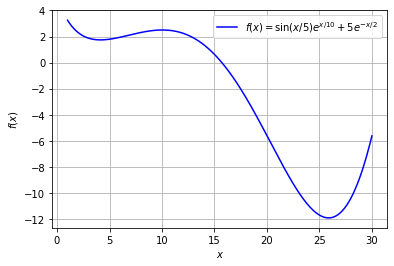

In [161]:
plt.plot(x, f(x), 'b-')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.legend(['$f(x)=\sin(x/5)e^{x/10}+5e^{-x/2}$'])
plt.grid(True)

In [162]:
from scipy.optimize import minimize

In [163]:
res = minimize(f, x0=0)
res.x, res.fun

(array([4.13628824]), 1.7452682903319903)

In [164]:
res = minimize(f, x0=30)
res.x, res.fun

(array([25.88019321]), -11.898894665981313)

## Точка минимума методом 'bfgs'

4.136276281772837 1.7452682903447336


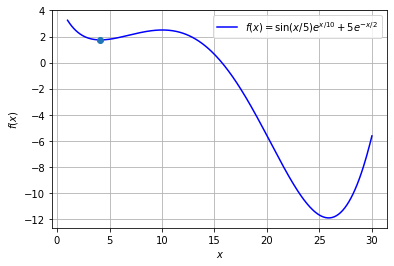

In [216]:
res_bfgs = minimize(f, x0=2, method='bfgs')
x_1, y_1 = res_bfgs.x[0], res_bfgs.fun
print(x_1, y_1)
plt.plot(x, f(x), 'b-')
plt.plot(res_bfgs.x[0], res_bfgs.fun, 'o')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.legend(['$f(x)=\sin(x/5)e^{x/10}+5e^{-x/2}$'])
plt.grid(True)

In [217]:
with open('submission_1.txt', 'w') as file:
#     file.write(' '.join([str(round(x_1, 2)), str(round(y_1, 2))]))
    file.write(' '.join([str(round(y_1, 2))]))
    file.write(' ')

25.880193206142593 -11.898894665981313


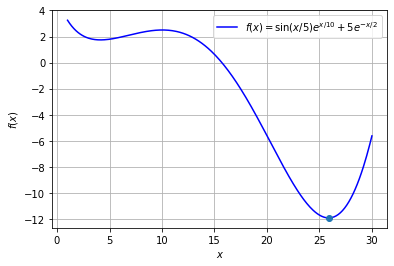

In [218]:
res_bfgs = minimize(f, x0=30, method='bfgs')
x_1, y_1 = res_bfgs.x[0], res_bfgs.fun
print(x_1, y_1)
plt.plot(x, f(x), 'b-')
plt.plot(res_bfgs.x[0], res_bfgs.fun, 'o')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.legend(['$f(x)=\sin(x/5)e^{x/10}+5e^{-x/2}$'])
plt.grid(True)

In [219]:
with open('submission_1.txt', 'a') as file:
#     file.write(' '.join([str(round(x_1, 2)), str(round(y_1, 2))]))
    file.write(' '.join([str(round(y_1, 2))]))

# Задача 2. Глобальная оптимизация

## Дифференциальная эволюция

In [221]:
from scipy.optimize import differential_evolution

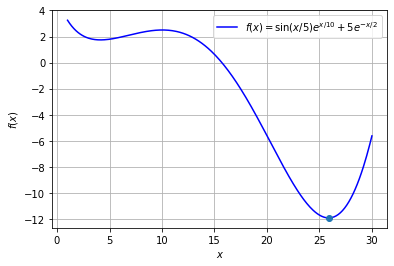

In [240]:
de = differential_evolution(f, [(1, 30)])
plt.plot(x, f(x), 'b-')
plt.plot(de.x[0], de.fun, 'o')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.legend(['$f(x)=\sin(x/5)e^{x/10}+5e^{-x/2}$'])
plt.grid(True)

In [247]:
x1, y1 = de.x[0], de.fun[0]
with open('submission_2.txt', 'w') as file:
    file.write(' '.join([str(round(y1, 2))]))

# Задача 3. Минимизация негладкой функции

Теперь рассмотрим функцию h(x) = int(f(x)) на том же отрезке [1, 30], т.е. теперь каждое значение f(x) приводится к типу int и функция принимает только целые значения.

In [290]:
f = lambda x: np.sin(x / 5.0) * np.exp(x / 10.0) + 5 * np.exp(-x / 2.0)
x = np.arange(1.0, 30.0, 0.25) # Массив значений аргумента
h = lambda x: int(f(x))

Такая функция будет негладкой и даже разрывной, а ее график будет иметь ступенчатый вид. Убедитесь в этом, построив график h(x) с помощью matplotlib.

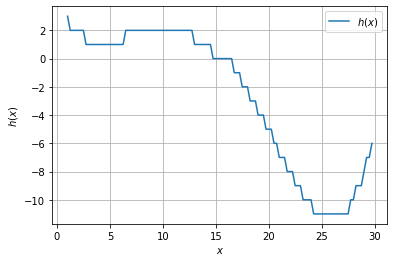

In [291]:
plt.plot(x, list(map(h, x))) # Построение графика
plt.xlabel('$x$') # Метка по оси x в формате TeX
plt.ylabel('$h(x)$') # Метка по оси y в формате TeX
plt.grid(True) # Сетка
plt.legend(( '$h(x)$', ))
plt.show() # Показать график

Попробуйте найти минимум функции h(x) с помощью BFGS, взяв в качестве начального приближения x=30. Получившееся значение функции – ваш первый ответ в этой задаче.

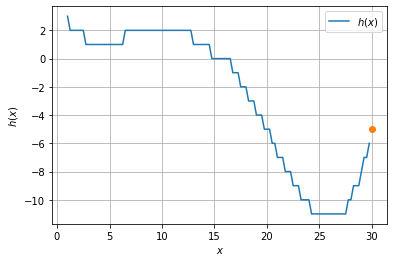

In [305]:
res_bfgs = minimize(h, x0=30, method='BFGS')
plt.plot(x, list(map(h, x))) # Построение графика
plt.plot(res_bfgs.x[0], res_bfgs.fun, 'o')
plt.xlabel('$x$') # Метка по оси x в формате TeX
plt.ylabel('$h(x)$') # Метка по оси y в формате TeX
plt.grid(True) # Сетка
plt.legend(( '$h(x)$', ))
plt.show() # Показать график
answer_1 = res_bfgs.fun

Теперь попробуйте найти минимум h(x) на отрезке [1, 30] с помощью дифференциальной эволюции. Значение функции h(x) в точке минимума – это ваш второй ответ в этом задании. Запишите его через пробел после предыдущего.

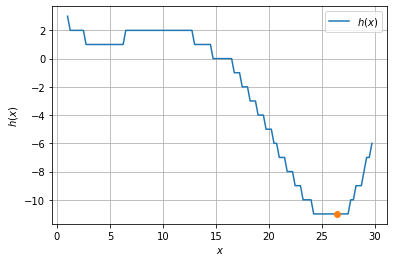

In [306]:
de = differential_evolution(h, [(1, 30)])
plt.plot(x, list(map(h, x))) # Построение графика
plt.plot(de.x[0], de.fun, 'o')
plt.xlabel('$x$') # Метка по оси x в формате TeX
plt.ylabel('$h(x)$') # Метка по оси y в формате TeX
plt.grid(True) # Сетка
plt.legend(( '$h(x)$', ))
plt.show() # Показать график
answer_2 = de.fun

In [307]:
with open('submission_3.txt', 'w') as file:
    file.write('%.2f %.2f' % (answer_1, answer_2))